# Bayesian Inference -- A Minimalistic Example

## Experiment Description


### Goal
Our goal is to infer the probability of heads $p$ given a series of coin flips. This is a simple, bare bones but relevant example of **Bayesian Inference.** For instance, in a real world setting, we might want to infer the parameters of a linear regression model given a series of observations.

### Setup
We are given a coin with a *true* but *unknown* probability of getting heads. In each time unit, we flip it and observe the outcome. Based on the result, we update our estimate of $p$ (denoted by $\hat{p}$). We often make assumptions of a *data generation process* with unknown parameters in a machine learning setting. Our goal is to infer these parameters given data.

More formally, at each time step $i$, we carry out an experiment denoted by a random variable $X_i ~ \sim \text{Bernoulli}(p)$. 


We update our estimate of $p$ at each step and calculate the **posterior predictive distribution** $p(X_{i+1} \mid X_{1..i})$ The [posterior predictive distribution](https://en.wikipedia.org/wiki/Posterior_predictive_distribution) gives us a forecast of the most likely values that can expect to see under the bayesian framework while taking the uncertainty of our estimates into consideration.

## [Show Me The Code!!!](https://www.youtube.com/watch?v=Lnrb8HnQvfU)
### Imports

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%pylab inline
from typing import List, Tuple

pylab.rcParams['figure.figsize'] = (8, 3)
sns.set_style("dark")

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Experiment Code

In [2]:
def flip_coin(p_true: float) -> int:
    return 1 if random.random() < p_true else 0


class BayesInferenceMachine:
    """
    Instantiated with a prior belief of the values of p. In theory this is a continuous distribution,
    but we have to 'discretize' it for the sake of the simulation. In our case, it is a list of `1001` values 
    each of which have a probability of `1/1001.`
    
    The workflow is as follows:
        - The `BayesInferenceMachine` object is instatiated.
        - For `observations` # of times, we do the following:
          - Flip a coin by calling the `flip_coin()` function.
          - Pass the observation to the `BayesInferenceMachine` by calling `bayes_inference.update_beliefs()`
          - Plot the posterior of the probabilities.
          - Plot the preditive posterior distribution.
    """
    
    def __init__(self, prior: List[float]):
        
        self.beliefs = prior
        self.multiplier = 1.0/(len(prior) - 1)  # Implementation detail, can ignore
        
    
    def _likelihood(self, p: float, observation: int) -> float:
        return p if observation == 1.0 else (1.0 - p)
    
    def _predictive_distribution(self) -> Tuple[float, float]:
        p_1 = 0
        for i, belief in enumerate(self.beliefs):
            p_1 += (belief * (i * self.multiplier))
        p_0 = 1.0 - p_1
        return p_0, p_1
    
    
    def update_beliefs(self, observation: int) -> List[float]:
        
        normalizing_constant, unnormalized_beliefs = 0, list()
        
        for i, belief in enumerate(self.beliefs):
            
            prior = belief  # unknown parameter has a value of 'prior_value' with a probability `belief`
            likelihood_parameter = i * self.multiplier
            likelihood = self._likelihood(likelihood_parameter, observation)
            normalizing_constant += likelihood * prior
            unnormalized_beliefs.append(likelihood * prior)
        
        # normalizing probabilities
        posterior = [x/normalizing_constant for x in unnormalized_beliefs]
        
        self.beliefs = posterior
        return posterior
    
    @property
    def posterior_mean(self) -> float:
        return self.multiplier * np.argmax(self.beliefs)
    
    
    # Plotting 
    def plot_predictive_distribution(self) -> None:
        p_0, p_1 = self._predictive_distribution()
        
        plt.bar(
            np.array([0, 1]), 
            np.array([p_0, p_1]), 
            alpha=0.6, 
            color=["#001f3f", "#85144b"]
        )
        
        plt.xticks([0, 1])
        plt.title("Posterior Predictive Distribution")
        
    def plot_belief(self, iteration: int) -> None:
        plt.plot(
            np.array([self.multiplier * i for i in range(len(self.beliefs))]), 
            np.array(self.beliefs), 
            color="#FF4136", 
            fillstyle="full"
        )
        plt.title("Belief distribution at observation {}".format(str(iteration)))

### Experiment Parameters

In [3]:
p_true = 0.45  # True value of p. We'll be using this to simulate our experiment.

discretization_constant = 1001

uniform_prior = [1.0/1001] * 1001  # Discretize the uniform probability
num_observations = 1500  # Number of iterations to run out experiment

plot_every = 100

### Plot stuff

### Plot Initial Prior Belief Instantiated with a Uniform Distribution 
Before any observations are seen.

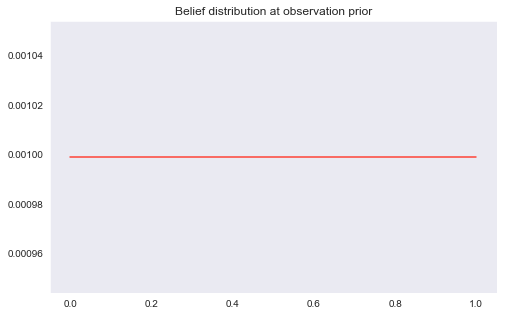

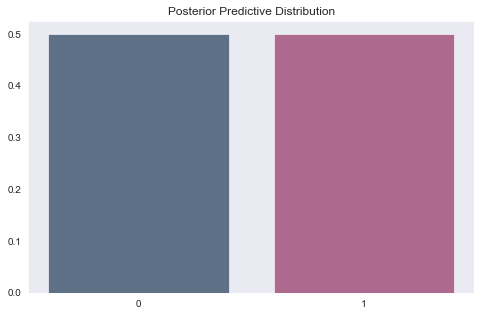

In [4]:
pylab.rcParams['figure.figsize'] = (8, 5)

inference_machine = BayesInferenceMachine(uniform_prior)
inference_machine.plot_belief("prior")
plt.show()
inference_machine.plot_predictive_distribution()
plt.show()

### Simulate and Plot

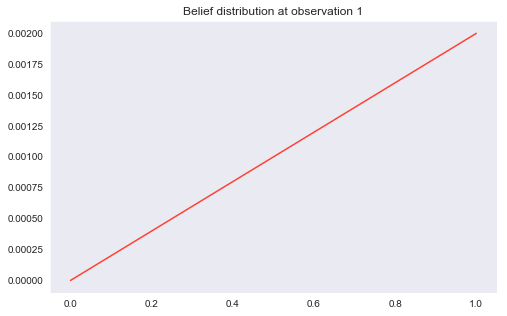

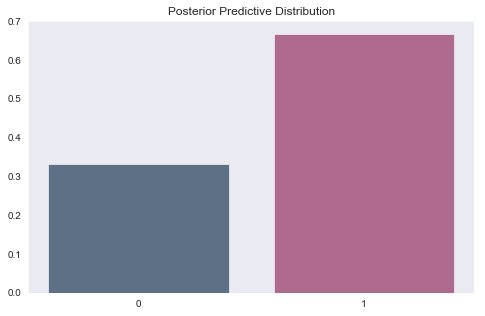

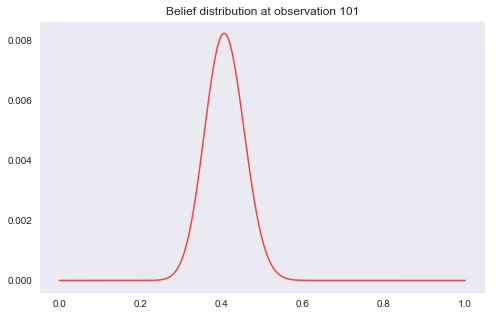

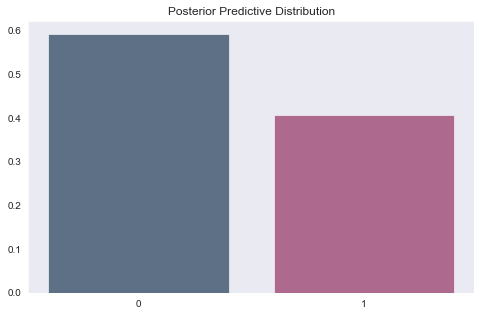

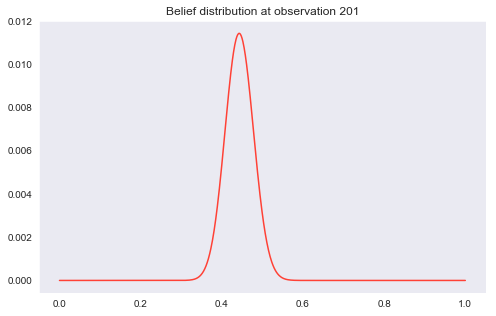

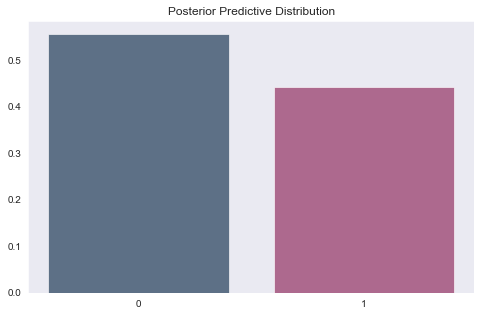

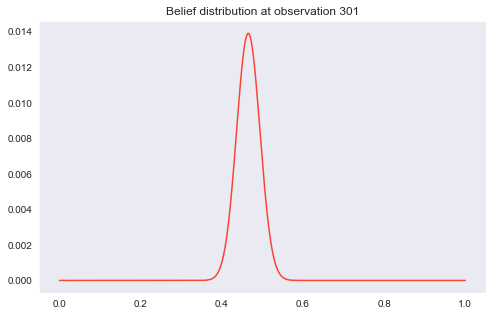

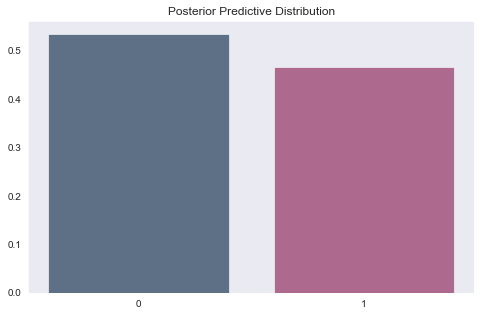

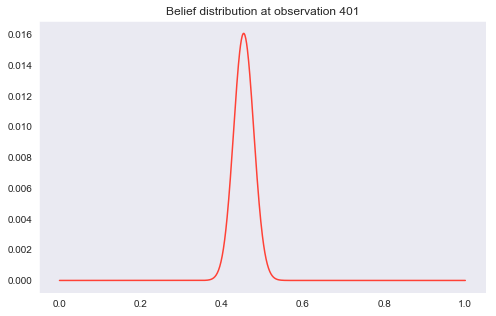

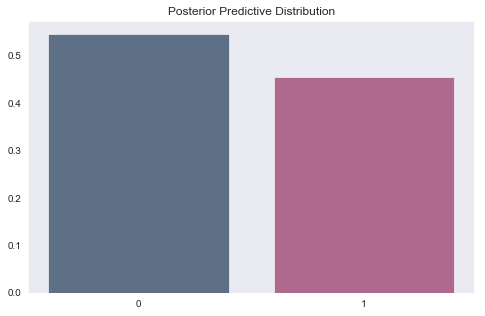

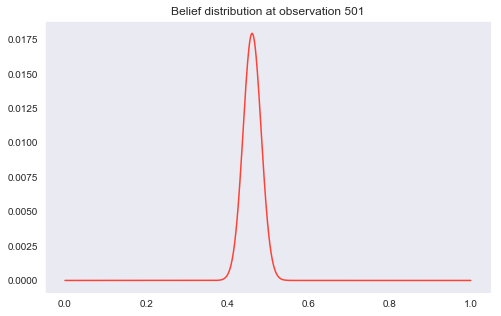

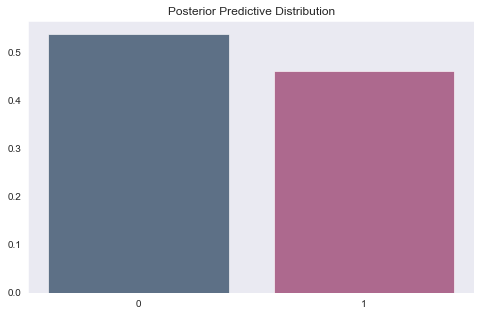

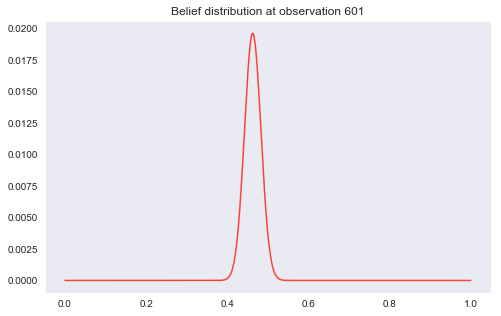

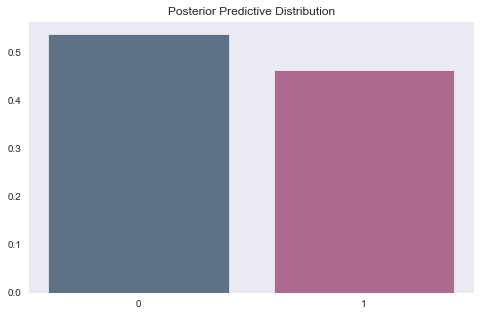

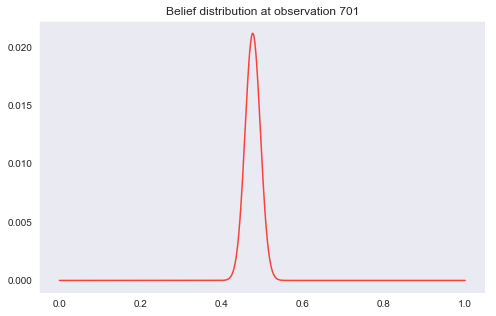

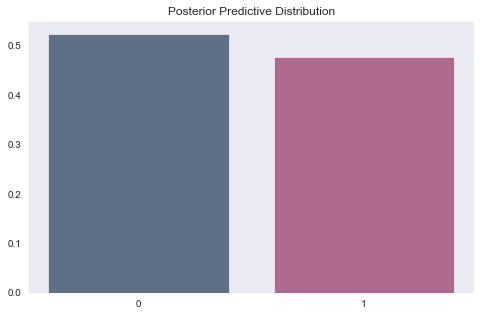

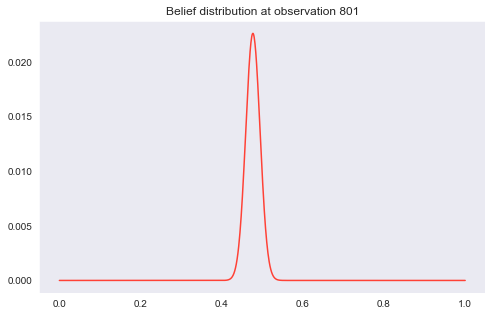

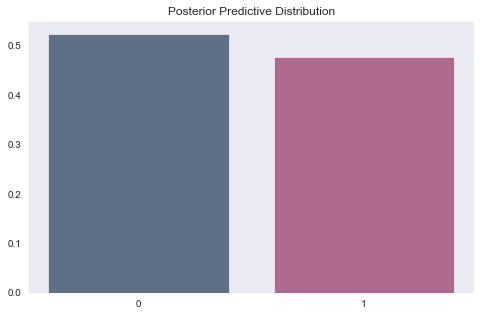

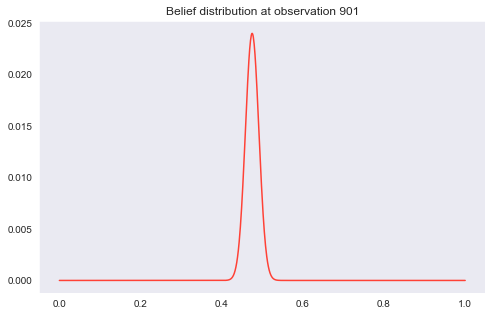

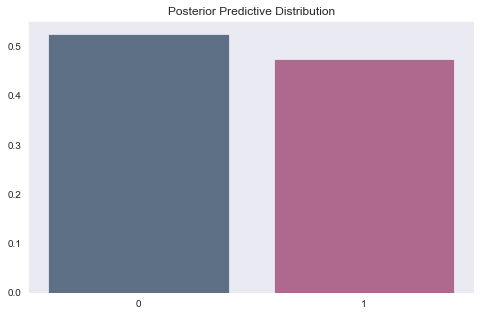

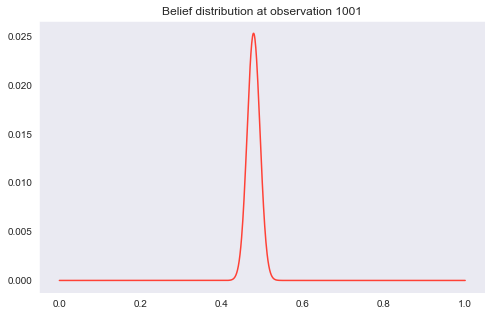

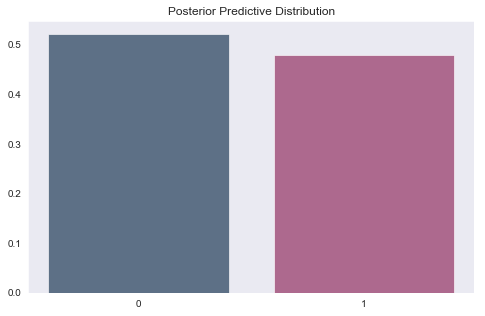

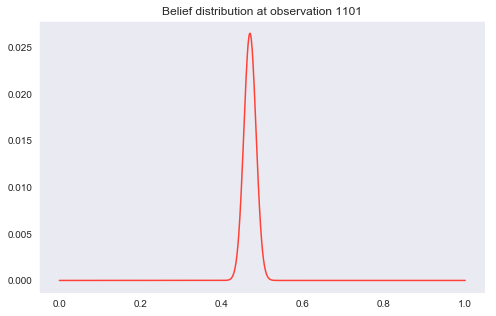

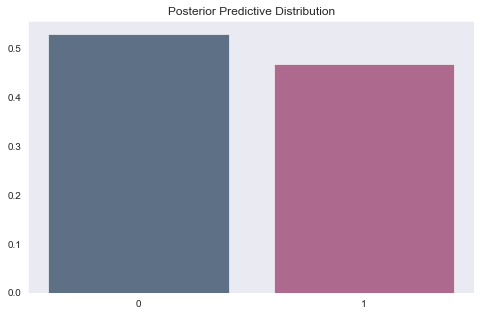

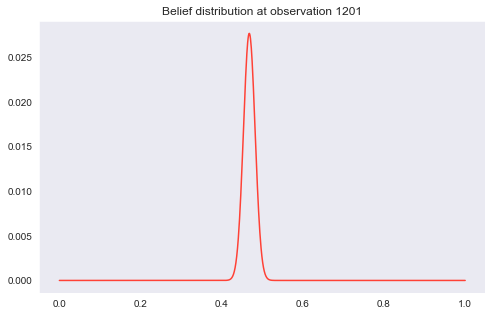

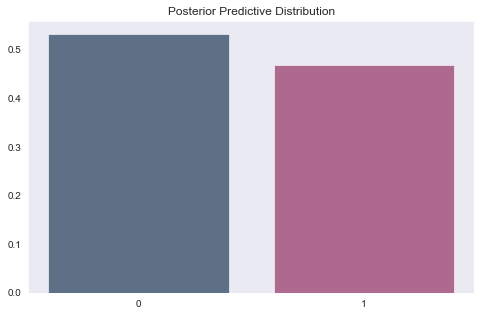

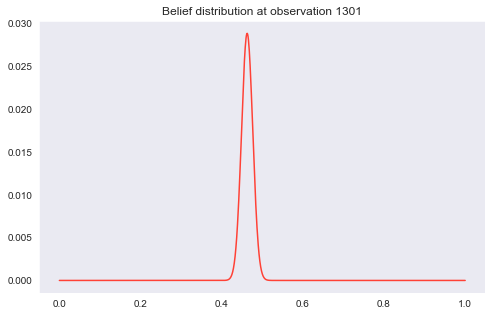

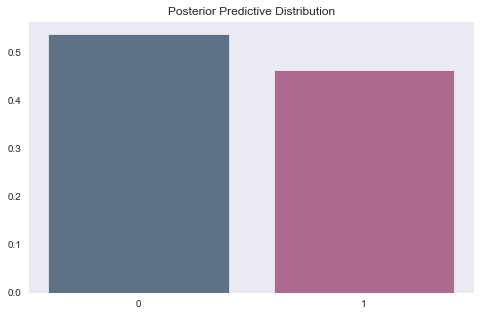

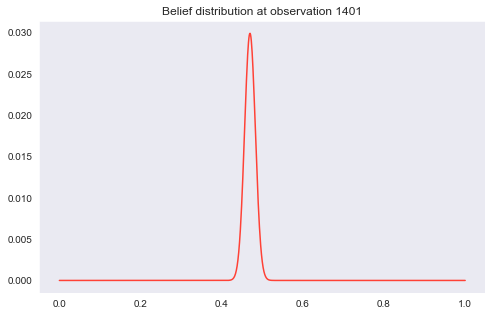

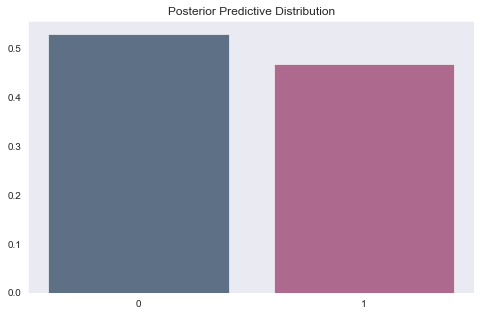

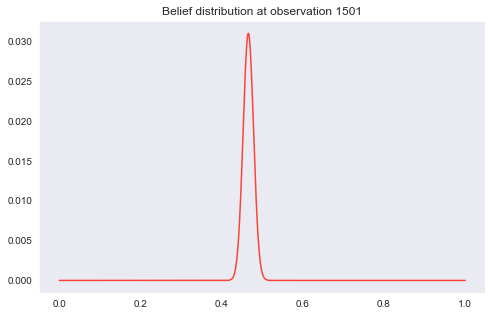

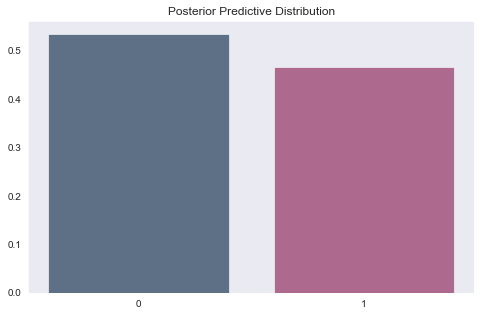

In [5]:
estimates = list()
for i in range(num_observations + 1):
    
    inference_machine.update_beliefs(
        flip_coin(p_true)
    )
    
    estimates.append(
        inference_machine.posterior_mean
    )
    
    if i % plot_every == 0:
        inference_machine.plot_belief(i + 1)
        plt.show()
        inference_machine.plot_predictive_distribution()
        plt.show()

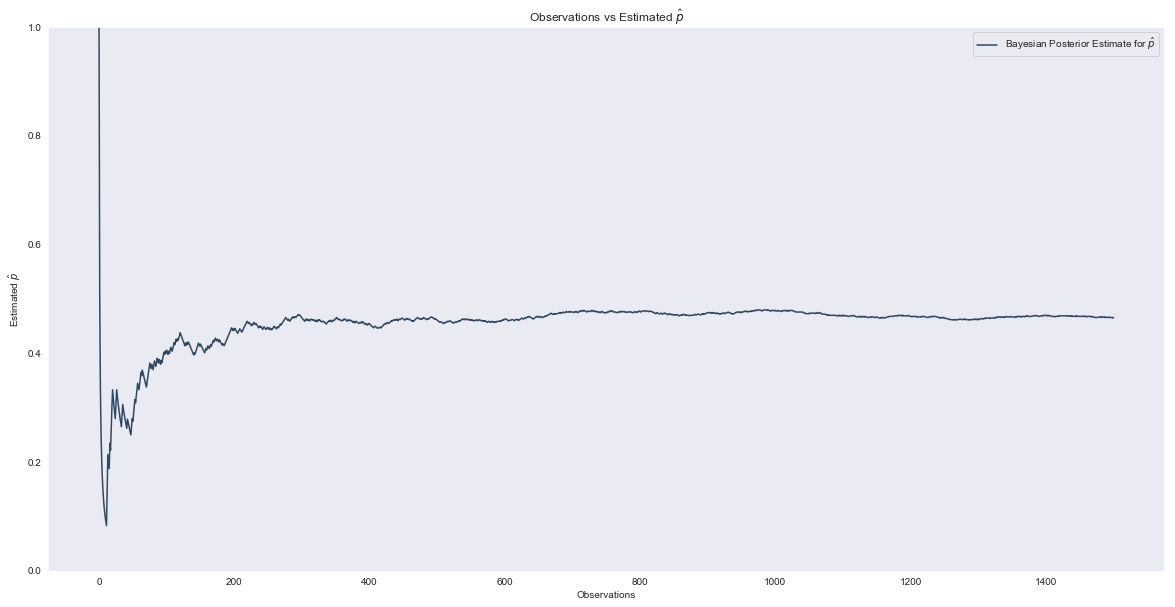

In [6]:
pylab.rcParams['figure.figsize'] = (20, 10)
plt.plot(np.array(range(num_observations + 1)), np.array(estimates), color="#001f3f", alpha=0.8, label="Bayesian Posterior Estimate for $\hat{p}$")
plt.legend(loc="best")
plt.xlabel("Observations")
plt.ylabel("Estimated $\hat{p}$")
plt.ylim(0, 1)
plt.title("Observations vs Estimated $\hat{p}$")
plt.show()

In [7]:
print("Final value estimated", inference_machine.posterior_mean)

Final value estimated 0.466


## Conclusion

Intuitively, the accuracy of the final estimate $\hat{p}$ increases with the number of observations. The posterior becomes centered around the true value and the uncertainty keeps reducing. The more data we have, the more confidence we have in our estimate.